In [52]:
import pandas as pd
import numpy as np

from sklearnex import patch_sklearn
patch_sklearn()

import os

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [53]:
data = pd.read_csv(os.getcwd()+'\\..\\..\\data\\final\\modelling.csv')
# data.drop(columns=['Unnamed: 0'], inplace=True)
data

,ObjectOfInterest,Disposition,OrbitalPeriod,TransitDuration,TransitDepth,PlanetType,PlanetName,StarSunDiameter,PlanetEarthVolume,StarClassification,MainSequence,PlanetEarthTemperature,StarSunMass
0,K00010.01,CFRM,0.009644,3.19843,9145.7,Gas Giant,Kepler-8 b,0.633473,0.000359,F,0,5.964706,1.134884
1,K00791.01,CFRM,0.034530,5.14970,6105.6,Gas Giant,Kepler-682 b,0.401214,0.000182,G,0,2.952941,0.993682
2,K00813.01,CFRM,0.010666,2.31110,8544.8,Gas Giant,Kepler-688 b,0.337910,0.000181,G,0,3.941176,0.855261
3,K00801.01,CFRM,0.004450,2.38963,7969.0,Gas Giant,Kepler-685 b,0.482854,0.000240,G,1,6.192157,0.937836
4,K00806.02,CFRM,0.165161,6.61880,20280.0,Gas Giant,Kepler-30 c,0.378512,0.000300,G,0,1.611765,0.987767
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12848,K00097.01,CFRM,0.013376,5.16165,7458.4,Gas Giant,Kepler-7 b,0.833425,0.000410,F,0,5.866667,1.236597
12849,K04301.01,CFRM,0.042724,4.54300,73.4,Super Earth,Kepler-1586 b,0.744800,0.000039,F,0,3.972549,1.110643
12850,K04772.02,CFRM,0.024694,5.92000,191.6,Neptune-like,Kepler-1705 b,0.335291,0.000026,G,0,3.094118,0.838183
12851,K03470.02,CFRM,0.069634,6.51400,302.0,Super Earth,Kepler-1509 b,0.505556,0.000049,G,0,2.615686,1.025731


# Model 1 Disposition

In [54]:
import warnings
warnings.filterwarnings('ignore')

classif_map = {
    'M': 0, 'K': 1, 'G': 2, 'F': 3, 'A': 4, 'B': 5, 'O': 6
}

disp_map = {
    'CFRM': 1, 'FPOS': 0
}

dis_df = data[data['Disposition']!='CAND']
dis_df.drop(columns=['PlanetType', 'PlanetName', 'ObjectOfInterest'], inplace=True)
dis_df['StarClassification'] = dis_df['StarClassification'].map(classif_map)
dis_df['Disposition'] = dis_df['Disposition'].map(disp_map)
dis_df = dis_df.reset_index(drop=True)
dis_df

,Disposition,OrbitalPeriod,TransitDuration,TransitDepth,StarSunDiameter,PlanetEarthVolume,StarClassification,MainSequence,PlanetEarthTemperature,StarSunMass
0,1,0.009644,3.19843,9145.7,0.633473,0.000359,3,0,5.964706,1.134884
1,1,0.034530,5.14970,6105.6,0.401214,0.000182,2,0,2.952941,0.993682
2,1,0.010666,2.31110,8544.8,0.337910,0.000181,2,0,3.941176,0.855261
3,1,0.004450,2.38963,7969.0,0.482854,0.000240,2,1,6.192157,0.937836
4,1,0.165161,6.61880,20280.0,0.378512,0.000300,2,0,1.611765,0.987767
...,...,...,...,...,...,...,...,...,...,...
7794,1,0.013376,5.16165,7458.4,0.833425,0.000410,3,0,5.866667,1.236597
7795,1,0.042724,4.54300,73.4,0.744800,0.000039,3,0,3.972549,1.110643
7796,1,0.024694,5.92000,191.6,0.335291,0.000026,2,0,3.094118,0.838183
7797,1,0.069634,6.51400,302.0,0.505556,0.000049,2,0,2.615686,1.025731


[23:36:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

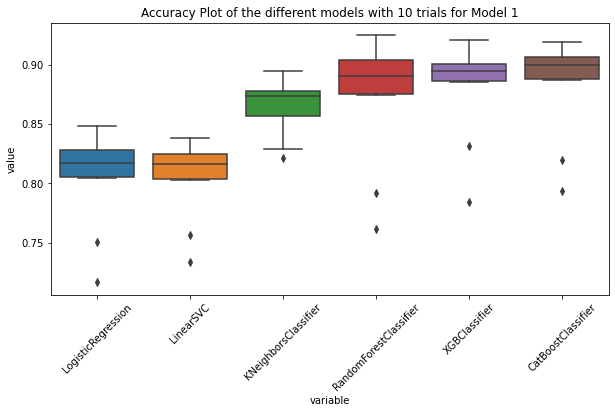

,KFold1,KFold2,KFold3,KFold4,KFold5,KFold6,KFold7,KFold8,KFold9,KFold10,Avg Score
LogisticRegression,0.750469,0.825516,0.831144,0.825516,0.829268,0.848030,0.808630,0.806754,0.804878,0.716698,0.804690
LinearSVC,0.756098,0.829268,0.825516,0.823640,0.816135,0.838649,0.804878,0.816135,0.803002,0.733583,0.804690
KNeighborsClassifier,0.829268,0.872420,0.894934,0.893058,0.878049,0.874296,0.855535,0.876173,0.859287,0.821764,0.865478
RandomForestClassifier,0.791745,0.902439,0.924953,0.906191,0.900563,0.904315,0.874296,0.878049,0.879925,0.761726,0.872420
XGBClassifier,0.831144,0.894934,0.921201,0.894934,0.902439,0.911820,0.889306,0.894934,0.885553,0.784240,0.881051
CatBoostClassifier,0.819887,0.900563,0.919325,0.908068,0.915572,0.902439,0.887430,0.898687,0.891182,0.793621,0.883677


In [46]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings('ignore')

MODELS = [
    LogisticRegression(),
    LinearSVC(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    CatBoostClassifier(verbose=0)
]

modelling = dis_df.copy()

# modelling = modelling.drop(columns=['StarClassification'])

transfomers = {}

for col in modelling.columns:
    if col != 'Disposition':
        transfomers[col] = PowerTransformer()
        modelling[col] = transfomers[col].fit_transform(modelling[col].values.reshape(-1,1))

X = modelling.drop(columns=['Disposition'])
y = modelling['Disposition']
rus = RandomUnderSampler(random_state=42)

X_rus, y_rus = rus.fit_resample(X, y)

results = {}
for model in MODELS:
    acc = cross_val_score(model, X_rus, y_rus, cv=10, scoring='accuracy')
    results[type(model).__name__] = acc

cv_results = pd.DataFrame(results, index=['KFold1', 'KFold2', 'KFold3', 'KFold4', 'KFold5', 'KFold6', 'KFold7', 'KFold8', 'KFold9', 'KFold10'])

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(x='variable', y='value', data=pd.melt(cv_results))
plt.xticks(rotation=45)
plt.title('Accuracy Plot of the different models with 10 trials for Model 1')
plt.show()

cv_results = cv_results.T

cv_results['Avg Score'] = (cv_results['KFold1'] + cv_results['KFold2'] + cv_results['KFold3'] + cv_results['KFold4'] + cv_results['KFold5'] + cv_results['KFold6'] + cv_results['KFold7'] + cv_results['KFold8'] + cv_results['KFold9'] + cv_results['KFold10']) / 10

cv_results.to_csv('DispositionKFolds.csv')

cf_matrix = 

cv_results

In [30]:
joblib.dump(transfomers, 'DispositionPowerTransformers.joblib')

['DispositionPowerTransformers.joblib']

In [31]:
import joblib

best_model1 = CatBoostClassifier()

best_model1.fit(X_rus, y_rus)
joblib.dump(best_model1, os.getcwd()+'\\..\\..\\dashboard\\streamlit\\pages\\models\\COS.joblib')


Learning rate set to 0.02105
0:	learn: 0.6769905	total: 32.2ms	remaining: 32.2s
1:	learn: 0.6632652	total: 75.2ms	remaining: 37.5s
2:	learn: 0.6500067	total: 96ms	remaining: 31.9s
3:	learn: 0.6358330	total: 176ms	remaining: 43.9s
4:	learn: 0.6229537	total: 193ms	remaining: 38.4s
5:	learn: 0.6095597	total: 209ms	remaining: 34.6s
6:	learn: 0.5973778	total: 274ms	remaining: 38.9s
7:	learn: 0.5866567	total: 301ms	remaining: 37.4s
8:	learn: 0.5760023	total: 344ms	remaining: 37.8s
9:	learn: 0.5655139	total: 359ms	remaining: 35.5s
10:	learn: 0.5559885	total: 374ms	remaining: 33.6s
11:	learn: 0.5460716	total: 417ms	remaining: 34.3s
12:	learn: 0.5361110	total: 432ms	remaining: 32.8s
13:	learn: 0.5280296	total: 491ms	remaining: 34.6s
14:	learn: 0.5185815	total: 507ms	remaining: 33.3s
15:	learn: 0.5105286	total: 572ms	remaining: 35.2s
16:	learn: 0.5030191	total: 589ms	remaining: 34.1s
17:	learn: 0.4963036	total: 605ms	remaining: 33s
18:	learn: 0.4896578	total: 673ms	remaining: 34.8s
19:	learn: 0.

['c:\\Users\\paolo\\Desktop\\Projects\\EskwelabsCapstone\\notebooks\\Modelling\\..\\..\\dashboard\\streamlit\\pages\\models\\COS.joblib']

# Model 2 Modelling

In [47]:
import warnings
warnings.filterwarnings('ignore')

import joblib
from sklearn.preprocessing import LabelEncoder

classif_map = {
    'M': 0, 'K': 1, 'G': 2, 'F': 3, 'A': 4, 'B': 5, 'O': 6
}

le = LabelEncoder()
dis_df = data[(data['Disposition']=='CFRM') & (data['PlanetType']!='Unknown')]
dis_df.drop(columns=['Disposition', 'PlanetName', 'ObjectOfInterest'], inplace=True)
dis_df['PlanetType'] = le.fit_transform(dis_df['PlanetType'].values.reshape(-1,1))
dis_df = dis_df.reset_index(drop=True)
dis_df['StarClassification'] = dis_df['StarClassification'].map(classif_map)
display(dis_df)

joblib.dump(le, 'PlanetLabelEncoder.joblib')

,OrbitalPeriod,TransitDuration,TransitDepth,PlanetType,StarSunDiameter,PlanetEarthVolume,StarClassification,MainSequence,PlanetEarthTemperature,StarSunMass
0,0.009644,3.19843,9145.7,0,0.633473,0.000359,3,0,5.964706,1.134884
1,0.034530,5.14970,6105.6,0,0.401214,0.000182,2,0,2.952941,0.993682
2,0.010666,2.31110,8544.8,0,0.337910,0.000181,2,0,3.941176,0.855261
3,0.004450,2.38963,7969.0,0,0.482854,0.000240,2,1,6.192157,0.937836
4,0.165161,6.61880,20280.0,0,0.378512,0.000300,2,0,1.611765,0.987767
...,...,...,...,...,...,...,...,...,...,...
2628,0.013376,5.16165,7458.4,0,0.833425,0.000410,3,0,5.866667,1.236597
2629,0.042724,4.54300,73.4,2,0.744800,0.000039,3,0,3.972549,1.110643
2630,0.024694,5.92000,191.6,1,0.335291,0.000026,2,0,3.094118,0.838183
2631,0.069634,6.51400,302.0,2,0.505556,0.000049,2,0,2.615686,1.025731


['PlanetLabelEncoder.joblib']

[00:03:45] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:03:49] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:03:52] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:03:54] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

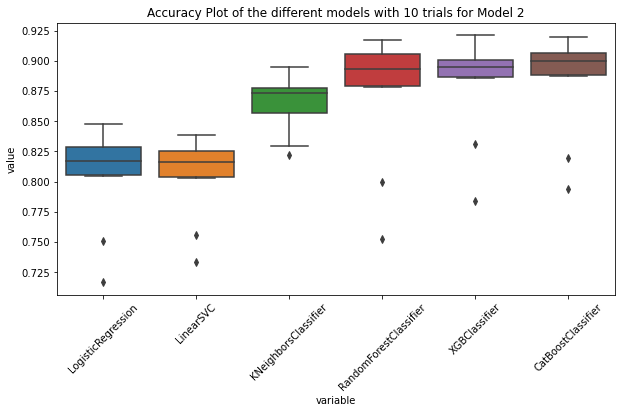

,KFold1,KFold2,KFold3,KFold4,KFold5,KFold6,KFold7,KFold8,KFold9,KFold10,Avg Score
LogisticRegression,0.750469,0.825516,0.831144,0.825516,0.829268,0.848030,0.808630,0.806754,0.804878,0.716698,0.804690
LinearSVC,0.756098,0.829268,0.825516,0.823640,0.816135,0.838649,0.804878,0.816135,0.803002,0.733583,0.804690
KNeighborsClassifier,0.829268,0.872420,0.894934,0.893058,0.878049,0.874296,0.855535,0.876173,0.859287,0.821764,0.865478
RandomForestClassifier,0.799250,0.896811,0.917448,0.908068,0.893058,0.908068,0.878049,0.893058,0.881801,0.752345,0.872795
XGBClassifier,0.831144,0.894934,0.921201,0.894934,0.902439,0.911820,0.889306,0.894934,0.885553,0.784240,0.881051
CatBoostClassifier,0.819887,0.900563,0.919325,0.908068,0.915572,0.902439,0.887430,0.898687,0.891182,0.793621,0.883677


In [48]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score

from imblearn.over_sampling import SMOTE

MODELS = [
    LogisticRegression(),
    LinearSVC(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    CatBoostClassifier(verbose=0)
]

modelling = dis_df.copy()

transformers = {}

for col in modelling.columns:
    if col != 'PlanetType':
        transformers[col] = PowerTransformer()
        modelling[col] = transformers[col].fit_transform(modelling[col].values.reshape(-1,1))

X = modelling.drop(columns=['PlanetType'])
y = modelling['PlanetType']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rus = SMOTE(random_state=42)

X_rus_train, y_rus_train = rus.fit_resample(X_train, y_train)

results = {}
for model in MODELS:
    acc = cross_val_score(model, X_rus, y_rus, cv=10, scoring='accuracy')
    results[type(model).__name__] = acc

cv_results = pd.DataFrame(results, index=['KFold1', 'KFold2', 'KFold3', 'KFold4', 'KFold5', 'KFold6', 'KFold7', 'KFold8', 'KFold9', 'KFold10'])

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(x='variable', y='value', data=pd.melt(cv_results))
plt.xticks(rotation=45)
plt.title('Accuracy Plot of the different models with 10 trials for Model 2')
plt.show()

cv_results = cv_results.T

cv_results['Avg Score'] = (cv_results['KFold1'] + cv_results['KFold2'] + cv_results['KFold3'] + cv_results['KFold4'] + cv_results['KFold5'] + cv_results['KFold6'] + cv_results['KFold7'] + cv_results['KFold8'] + cv_results['KFold9'] + cv_results['KFold10']) / 10
cv_results

In [49]:
cv_results.to_csv('PlanetTypeKFolds.csv')

In [35]:
joblib.dump(transformers, 'TypePowerTransformers.joblib')

['TypePowerTransformers.joblib']

In [36]:
import joblib


best_model2 = CatBoostClassifier().fit(X_rus, y_rus)
joblib.dump(best_model2, os.getcwd()+'\\..\\..\\dashboard\\streamlit\\pages\\models\\MO.joblib')


Learning rate set to 0.085588
0:	learn: 1.2475421	total: 80ms	remaining: 1m 19s
1:	learn: 1.1403533	total: 152ms	remaining: 1m 16s
2:	learn: 1.0546403	total: 214ms	remaining: 1m 11s
3:	learn: 0.9850009	total: 273ms	remaining: 1m 7s
4:	learn: 0.9290422	total: 317ms	remaining: 1m 3s
5:	learn: 0.8798319	total: 373ms	remaining: 1m 1s
6:	learn: 0.8373112	total: 433ms	remaining: 1m 1s
7:	learn: 0.8007614	total: 478ms	remaining: 59.3s
8:	learn: 0.7688274	total: 545ms	remaining: 1m
9:	learn: 0.7403380	total: 588ms	remaining: 58.2s
10:	learn: 0.7160482	total: 677ms	remaining: 1m
11:	learn: 0.6925422	total: 820ms	remaining: 1m 7s
12:	learn: 0.6717334	total: 936ms	remaining: 1m 11s
13:	learn: 0.6532023	total: 1.01s	remaining: 1m 11s
14:	learn: 0.6356541	total: 1.09s	remaining: 1m 11s
15:	learn: 0.6185788	total: 1.13s	remaining: 1m 9s
16:	learn: 0.6045140	total: 1.19s	remaining: 1m 9s
17:	learn: 0.5891149	total: 1.26s	remaining: 1m 8s
18:	learn: 0.5777627	total: 1.31s	remaining: 1m 7s
19:	learn: 0

['c:\\Users\\paolo\\Desktop\\Projects\\EskwelabsCapstone\\notebooks\\Modelling\\..\\..\\dashboard\\streamlit\\pages\\models\\MO.joblib']

,OrbitalPeriod,TransitDuration,TransitDepth,StarSunDiameter,PlanetEarthVolume,StarClassification,MainSequence,PlanetEarthTemperature,StarSunMass
0,-1.004120,-0.189676,2.328620,1.150697,2.411677,1.524431,-0.733463,1.625102,0.928119
1,-0.148873,0.664768,2.073856,-0.153064,2.116337,0.088660,-0.733463,-0.046692,0.311862
2,-0.962890,-0.775915,2.286716,-0.665311,2.108859,0.088660,-0.733463,0.620733,-0.324160
3,-1.222878,-0.716051,2.243308,0.392636,2.304461,0.088660,1.363396,1.717770,0.059279
4,1.652229,1.100790,2.792634,-0.326740,2.382408,0.088660,-0.733463,-1.317361,0.285358
...,...,...,...,...,...,...,...,...,...
4655,-1.142753,-0.873202,-1.858621,0.271635,-1.626725,0.088660,1.363396,1.471843,0.558689
4656,-0.654325,0.526517,-2.756328,0.645412,-1.672601,1.524431,-0.733463,0.804843,0.700861
4657,-0.960977,-1.065459,-1.001849,-1.212858,-1.552735,-1.267597,-0.733463,0.091681,-1.261689
4658,-1.081557,-0.192347,-2.291383,0.975025,-1.535850,0.088660,-0.733463,1.538761,0.705497


In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rus = SMOTE(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

model_test = CatBoostClassifier(verbose=0)
model_test.fit(X_train, y_train)
pred = model_test.predict(X_test)

print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))

[[ 17   5   2   0]
 [  7 215  23   0]
 [  1  38 182   7]
 [  0   1   9  20]]
0.8235294117647058
